In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# 한글 폰트를 사용할 때 마이너스 부호가 깨져 보이는 문제에 대처한다.
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
data = np.random.randint(-100, 100, 50).cumsum()
data

array([-58,  -2,  72,  54, 128, 227, 165,  99, 142, 154, 240, 291, 245,
       297, 250, 292, 290, 266, 320, 408, 458, 542, 502, 424, 434, 454,
       355, 361, 360, 338, 276, 251, 290, 322, 257, 200, 246, 211, 197,
       280, 261, 246, 202, 198, 198, 108, 184, 179,  96,  59], dtype=int32)

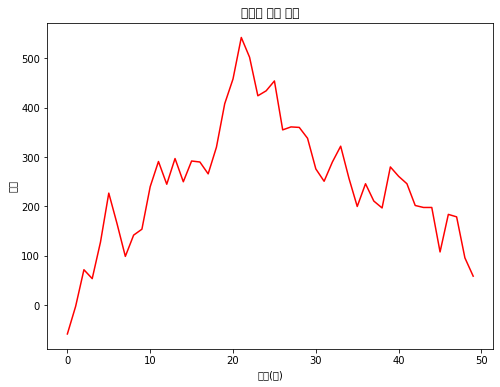

In [4]:
plt.figure(figsize=(8,6)) # 차트 크기 설정
# plt.rcParams['figure.figsize'] = (8,6) # 차트 크기 설정
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이') # 차트 제목
plt.xlabel('시간(분)') # x 축 제목
plt.ylabel('가격') # y 축 제목
plt.show()

폰트를 설정해 주기에 앞서 설치된 matplotlib의 버전과 설치된 위치 정보를 확인한다.  

In [5]:
print('버전:', mpl.__version__)
print('설치 경로:',mpl.__file__)
print('환경 설정 정보 경로:',mpl.get_configdir())
print('캐시 경로:',mpl.get_cachedir())

버전: 3.3.4
설치 경로: c:\python\lib\site-packages\matplotlib\__init__.py
환경 설정 정보 경로: C:\Users\TJ\.matplotlib
캐시 경로: C:\Users\TJ\.matplotlib


matplotlib의 설정 위치 정보를 알았으니 설정 파일의 위치를 확인한다.

In [6]:
print('설정 파일 경로:',mpl.matplotlib_fname())

설정 파일 경로: c:\python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


컴퓨터에 설치된 폰트 목록을 얻어온다.

In [7]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10])

228
['C:\\Windows\\Fonts\\HancomHoonminjeongeumH.ttf', 'C:\\Windows\\Fonts\\palai.ttf', 'C:\\Windows\\Fonts\\framdit.ttf', 'C:\\Windows\\Fonts\\batang.ttc', 'C:\\Windows\\Fonts\\GARAIT.TTF', 'C:\\Windows\\Fonts\\BKANT.TTF', 'C:\\Windows\\Fonts\\trebucit.ttf', 'C:\\Windows\\Fonts\\H2SA1M.TTF', 'C:\\Windows\\Fonts\\seguisbi.ttf', 'C:\\Windows\\Fonts\\DUBAI-BOLD.TTF']


In [8]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(f))
print(f[:10])

265
['STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Serif', 'cmtt10', 'STIXGeneral', 'STIXSizeFourSym', 'STIXNonUnicode']


나눔 글꼴을 사용할 것이므로 폰트 이름에 'Nanum'이 포함된 폰트만 가져온다.

In [9]:
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list[:10]

[('NanumGothicCoding', 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'),
 ('NanumGothicCoding', 'C:\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'),
 ('NanumGothicCoding',
  'C:\\Users\\TJ\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf')]

폰트를 설치했는데 위의 코드를 실행한 결과가 []만 나오거나 설치한 폰트가 보이지 않는다면 캐시 폴터로 이동해 폴더의 모든 내용을 삭제한 후 다시 실행하면 폰트 목록이 정상적으로 보인다.

In [10]:
# mpl.font_manager._rebuild()

한글 폰트를 사용하도록 설정하는 방법은 3가지가 있다. 

<1> FontProperties를 사용하는 방법 => 그래프에 폰트가 필요한 항목마다 개별적으로 지정한다.    

In [11]:
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고 지정해준 항목에만 
# 해당 폰트가 적용된다.
# matplotlib.pyplot => title(), xlabel(), ylabel(), legend(), text()
# matplotlib.axes => set_title()

font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font, size=15)

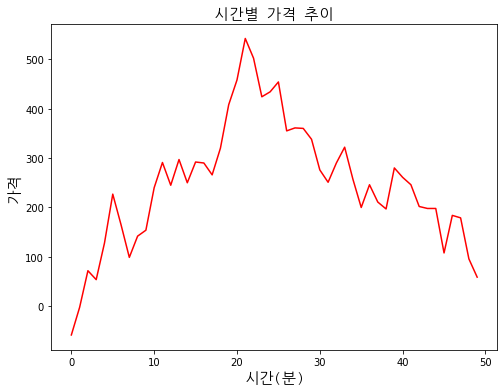

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

<2> matplotlib 라이브러리의 rcParms[]로 전역 글꼴 설정 => 그래프의 폰트 설정이 필요한 파일마다 지정한다.  

In [13]:
# matplotlib 폰트 기본 설정 정보 읽기
print('기본으로 설정된 폰트 이름:', plt.rcParams['font.family'])
print('기본으로 설정된 폰트 크기:', plt.rcParams['font.size'])

기본으로 설정된 폰트 이름: ['sans-serif']
기본으로 설정된 폰트 크기: 10.0


In [14]:
# 2-1 강추, import 셀에 넣는다.
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15

In [15]:
print('변경된 폰트 이름:', plt.rcParams['font.family'])
print('변경된 폰트 크기:', plt.rcParams['font.size'])

변경된 폰트 이름: ['NanumGothicCoding']
변경된 폰트 크기: 15.0


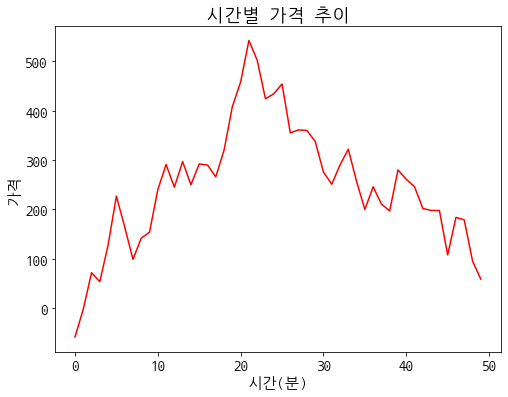

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('가격')
plt.show()

In [21]:
# 2-2
# rcParams 대신 FontProperties의 plt.rc를 사용하는 방법이 있다.
font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=font).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.rc('font', size=15)

NanumGothicCoding


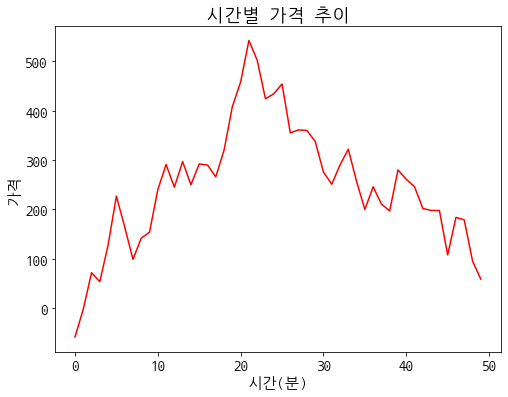

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('가격')
plt.show()

<3> 폰트 설정 정보를 matplotlibrc 파일에 직접 넣어준다. => 그래프의 폰트가 필요한 컴퓨터 단위로 지정한다.  

In [19]:
# mpl.matplotlib_fname()를 실행하면 출력되는 경로의 matplotlibrc 
# 파일을 수정한다.
# matplotlibrc 파일을 수정하면 쥬피터 노트북을 실행할 때 마다 별도의 
# 설정없이 matplotlibrc 파일의 설정을 사용한다.
print(mpl.matplotlib_fname())
# font.family: sans-serif => NanumGothicCoding
# font.size: 10.0 => 15.0

c:\python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


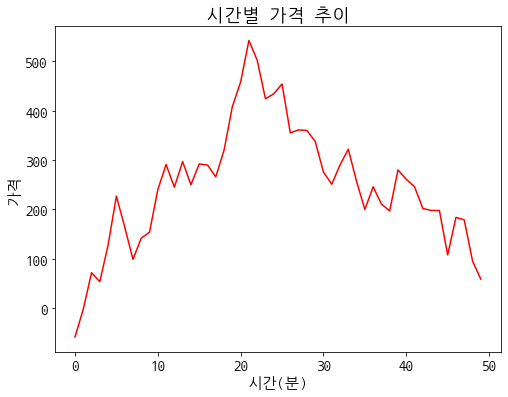

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('가격')
plt.show()